In [1]:
%matplotlib widget
import processscheduler as ps

# Bike shop
Ported from https://github.com/timnon/pyschedule/blob/master/example-notebooks/bike-shop.ipynb

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 7 elapsed time:0.023s

Checking better value < 7

Found value: 6 elapsed time:0.033s

Checking better value < 6

Found value: 5 elapsed time:0.037s

Checking better value < 5

Found value: 4 elapsed time:0.040s

Checking better value < 4

Can't find a better solution for problem BikeShop.

Found optimum 4. Stopping iteration.

total number of iterations: 5

value: 4

BikeShop satisfiability checked in 0.04s

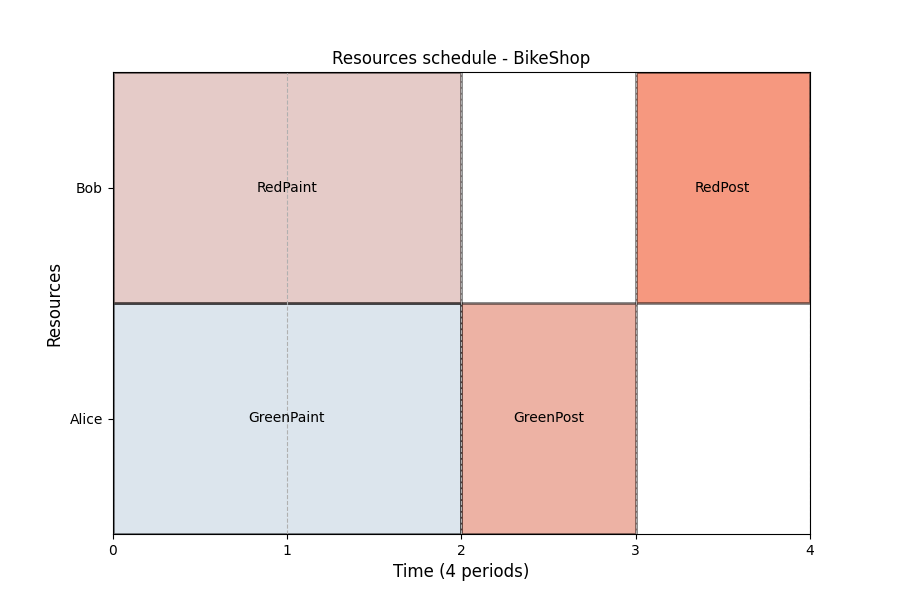

In [2]:
pb_bs = ps.SchedulingProblem(name="BikeShop")

# tasks
green_paint = ps.FixedDurationTask(name="GreenPaint", duration=2)
red_paint = ps.FixedDurationTask(name="RedPaint", duration=2)
green_post = ps.FixedDurationTask(name="GreenPost", duration=1)
red_post = ps.FixedDurationTask(name="RedPost", duration=1)

# workers
Alice = ps.Worker(name="Alice")
Bob = ps.Worker(name="Bob")

# precedence constraints
ps.TaskPrecedence(task_before=green_paint, task_after=green_post)
ps.TaskPrecedence(task_before=red_paint, task_after=red_post, offset=1, kind="tight")

# resource assignment
green_paint.add_required_resource(
    ps.SelectWorkers(list_of_workers=[Alice, Bob], nb_workers_to_select=1)
)
green_post.add_required_resource(
    ps.SelectWorkers(list_of_workers=[Alice, Bob], nb_workers_to_select=1)
)
red_paint.add_required_resource(
    ps.SelectWorkers(list_of_workers=[Alice, Bob], nb_workers_to_select=1)
)
red_post.add_required_resource(
    ps.SelectWorkers(list_of_workers=[Alice, Bob], nb_workers_to_select=1)
)

# add makespan objective
ps.ObjectiveMinimizeMakespan()

# plot solution
solver = ps.SchedulingSolver(problem=pb_bs)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 6 elapsed time:0.025s

Checking better value < 6

Found value: 5 elapsed time:0.041s

Checking better value < 5

Can't find a better solution for problem BikeShop.

Found optimum 5. Stopping iteration.

total number of iterations: 3

value: 5

BikeShop satisfiability checked in 0.04s

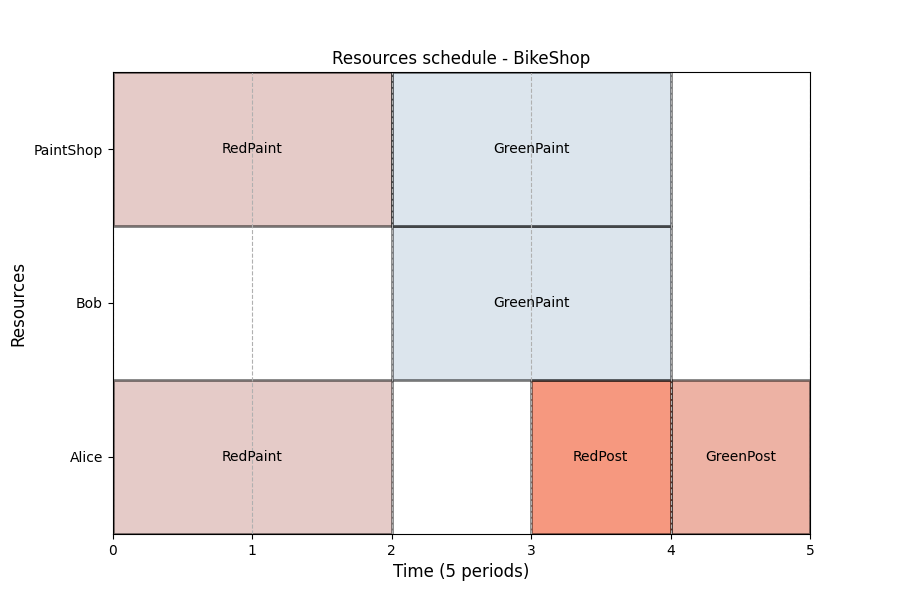

In [3]:
paint_shop = ps.Worker(name="PaintShop")

red_paint.add_required_resource(paint_shop)
green_paint.add_required_resource(paint_shop)

# create another solver instance
solver_2 = ps.SchedulingSolver(problem=pb_bs)
solution2 = solver_2.solve()
ps.render_gantt_matplotlib(solution2)

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 7 elapsed time:0.041s

Checking better value < 7

Found value: 6 elapsed time:0.046s

Checking better value < 6

Can't find a better solution for problem BikeShop.

Found optimum 6. Stopping iteration.

total number of iterations: 3

value: 6

BikeShop satisfiability checked in 0.05s

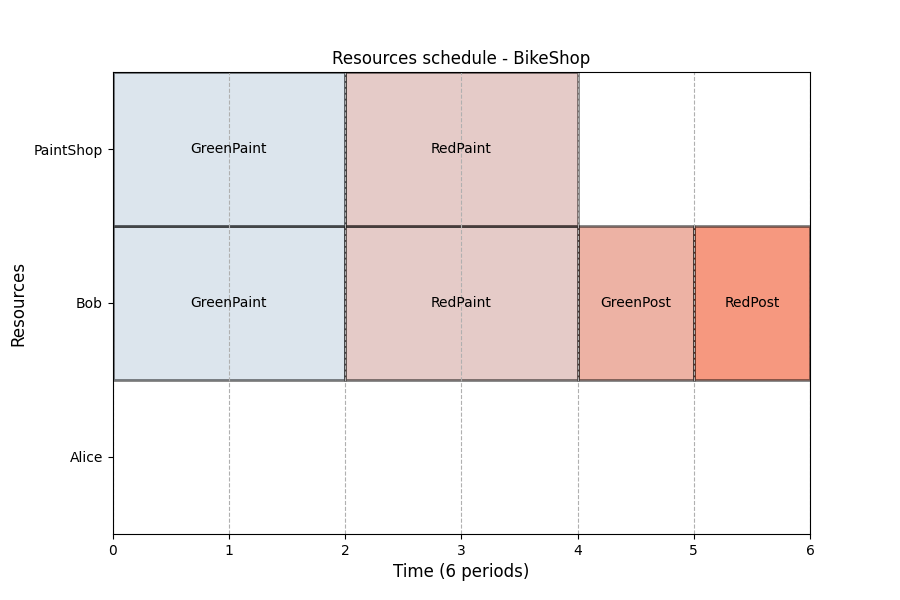

In [4]:
ps.TaskStartAfter(task=red_paint, value=2)

# create another solver instance
solver_3 = ps.SchedulingSolver(problem=pb_bs)
solution_3 = solver_3.solve()
ps.render_gantt_matplotlib(solution_3)